# Google Authentication

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/CSE519Fall2021/Final_Project

/content/gdrive/MyDrive/CSE519Fall2021/Final_Project


# Data Sets 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Covid_countylevel.csv')


In [ ]:
df_population=pd.read_csv('Population.csv')

In [ ]:
df_education=pd.read_csv('Education_Degree.csv')

In [ ]:
df_poverty=pd.read_csv('Poverty.csv')

In [ ]:
df_employment=pd.read_csv('Employment_Rate.csv')

In [ ]:
df_policy=pd.read_csv('State_Vaccination_policy.csv')

In [ ]:
df_covid_cases=pd.read_csv("covid_cases.csv")

In [ ]:
df.drop(df[df['FIPS']=='UNK'].index, inplace = True)

In [ ]:
df['FIPS']=df['FIPS'].astype('float').astype('Int64')

In [ ]:
df_population.rename(columns={'FIPStxt':'FIPS'},
inplace=True)

In [ ]:
df_employment.rename(columns={'FIPS_Code':'FIPS'},
inplace=True)

In [ ]:
df_population['Population'] = df_population['Population'].apply(lambda x:str(x).replace(",",""))

In [ ]:
df_population['Population'] = df_population['Population'].astype('float').astype('Int64')

In [ ]:
dataframe = df.merge(df_population, on=['FIPS'])

In [ ]:
dataframe=dataframe.merge(df_education,on=['FIPS'])

In [ ]:
dataframe=dataframe.merge(df_poverty, on=['FIPS'])

In [ ]:
dataframe=dataframe.merge(df_employment, on=['FIPS'])

In [ ]:
dataframe=dataframe.merge(df_policy,on='Recip_State')

In [ ]:
dataframe=dataframe.drop(['State','Area name'],axis=1)

In [ ]:
dataframe['Recip_County'].dropna(how='any',inplace=True)

In [ ]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%m/%d/%Y')

In [ ]:
dataframe['YearMonth'] = dataframe['Date'].dt.strftime('%Y-%m')

In [ ]:
dataframe1 = dataframe.pivot_table('Series_Complete_Yes', index='YearMonth', columns='Recip_County', 
                   aggfunc={'Series_Complete_Yes':['sum']})

In [ ]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Year'] = dataframe.Date.dt.year
dataframe['Month'] = dataframe.Date.dt.month

In [ ]:
df_cc1=pd.read_csv("covid_p.csv")

In [ ]:
df_cc2=pd.read_csv("covid_r.csv")

# Data PreProcessing

In [ ]:
cols=['below_high_school','High_school_diploma','Some_college_degree','Higher_Bachelors_degree','Poverty_ALL','Median_Household_Income','Civilian_labor_force_2020','Employed_2020','Unemployed_2020']

In [ ]:
for C in cols:
    dataframe[C] = dataframe[C].apply(lambda x:str(x).replace(",",""))

In [ ]:
dataframe[cols] = dataframe[cols].astype('float').astype('Int64')

In [ ]:
dataframe_any = dataframe.groupby(['Recip_County', 'FIPS','Recip_State','Free_Vaccine','Metro_status','Mandate_place']).mean()

In [ ]:
dataframe['Metro_status'].fillna("Non-metro", inplace = True) 

In [ ]:
dataframe['Metro_status'] = dataframe['Metro_status'].map({'Non-metro': 0,'Metro': 1})

In [ ]:
dataframe['Metro_status'] = dataframe['Metro_status'].astype(int)

In [ ]:
colms=['Series_Complete_12Plus','Series_Complete_12PlusPop_Pct','Administered_Dose1_Recip','Administered_Dose1_Recip_12Plus','Administered_Dose1_Recip_12PlusPop_Pct','Administered_Dose1_Recip_18Plus','Administered_Dose1_Recip_65Plus',
       'Series_Complete_Pop_Pct_SVI','Series_Complete_12PlusPop_Pct_SVI','Series_Complete_18PlusPop_Pct_SVI','Series_Complete_65PlusPop_Pct_SVI','Series_Complete_Pop_Pct_UR_Equity','Series_Complete_12PlusPop_Pct_UR_Equity','Series_Complete_18PlusPop_Pct_UR_Equity',
       'Series_Complete_65PlusPop_Pct_UR_Equity']

In [ ]:
dataframe[colms]=dataframe[colms].fillna(value=0)

In [ ]:
dataframe['SVI_CTGY']=dataframe['SVI_CTGY'].fillna(value='E')

In [ ]:
dataframe['SVI_CTGY']=dataframe['SVI_CTGY'].map({'A':1,'B':2,'C':3,'D':4,'E':0})

In [ ]:
dataframe['SVI_CTGY']=dataframe['SVI_CTGY'].astype(int)

In [ ]:
df_covid_cases['community_transmission_level'].unique()

array(['substantial', 'high', 'low', 'moderate', nan], dtype=object)

In [ ]:
df_covid_cases['community_transmission_level']=df_covid_cases['community_transmission_level'].fillna(value='0')

In [ ]:
df_covid_cases['community_transmission_level']=df_covid_cases['community_transmission_level'].map({'substantial':2, 'high':3, 'low':0, 'moderate':1,'0':0})

In [ ]:
df_covid_cases['report_date'].dropna(how='any',inplace=True)

In [ ]:
df_covid_cases[['cases_per_100K_7_day_count_change','percent_test_results_reported_positive_last_7_days']]=df_covid_cases[['cases_per_100K_7_day_count_change','percent_test_results_reported_positive_last_7_days']].fillna(value=0)

In [ ]:
#df_covid_cases.drop(columns=['state_name', 'county_name'], inplace=True)

In [ ]:
#df_covid_cases['cases_per_100K_7_day_count_change']=df_covid_cases['cases_per_100K_7_day_count_change'].map({'suppressed':'0'})

In [ ]:
#df_covid_cases['cases_per_100K_7_day_count_change'].value_counts()

In [ ]:
#df_covid_cases['cases_per_100K_7_day_count_change']=df_covid_cases['cases_per_100K_7_day_count_change'].fillna(value=0)

In [ ]:
dataframe['Date']=pd.to_datetime(dataframe['Date'],format='%M/%d/%Y')

In [ ]:
 dataframe['YearMonth']=pd.to_datetime(dataframe['YearMonth'],format='%Y-%m')

In [ ]:
df_cc2.dropna(inplace=True)

In [ ]:
df_cc2['date']=pd.to_datetime(df_cc2['date'])

In [ ]:
df_cc2['YearMonth'] = df_cc2['date'].dt.strftime('%Y-%m')

# Analysis

**Correlation**

In [ ]:
option=['Series_Complete_Yes','Population','Poverty_ALL','Higher_Bachelors_degree','Median_Household_Income']

In [ ]:
dataframe_feature = dataframe[option]
pearson = dataframe_feature.corr(method='pearson')
round(pearson,2)

,Series_Complete_Yes,Population,Poverty_ALL,Higher_Bachelors_degree,Median_Household_Income
Series_Complete_Yes,1.00,0.76,0.71,0.76,0.24
Population,0.76,1.00,0.97,0.97,0.29
Poverty_ALL,0.71,0.97,1.00,0.90,0.16
Higher_Bachelors_degree,0.76,0.97,0.90,1.00,0.35
Median_Household_Income,0.24,0.29,0.16,0.35,1.00


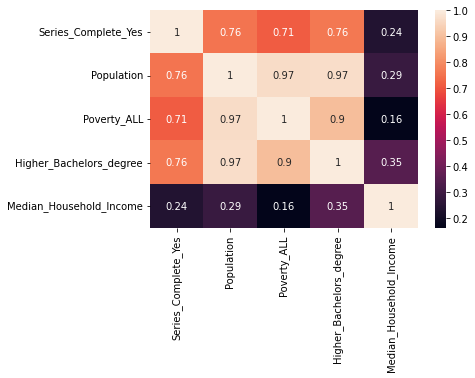

In [ ]:
dataframe_feature = dataframe[option]
pearson = dataframe_feature.corr(method='pearson')
import seaborn as sns
sns.heatmap(pearson,annot=True);

**Metro vs Non Metro**

In [ ]:
x=dataframe[['Metro_status','Series_Complete_Yes']].groupby('Metro_status').sum()

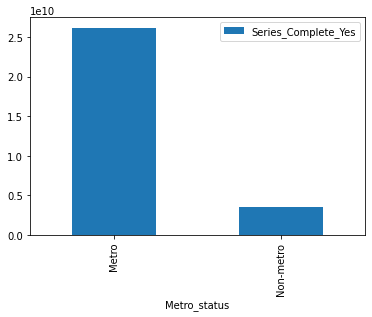

In [ ]:
x.plot(kind='bar')

**Vaccination Policies vs Vaccination trend**

In [ ]:
jaffa=dataframe[['Free_Vaccine','Series_Complete_Yes']].groupby('Free_Vaccine').sum()

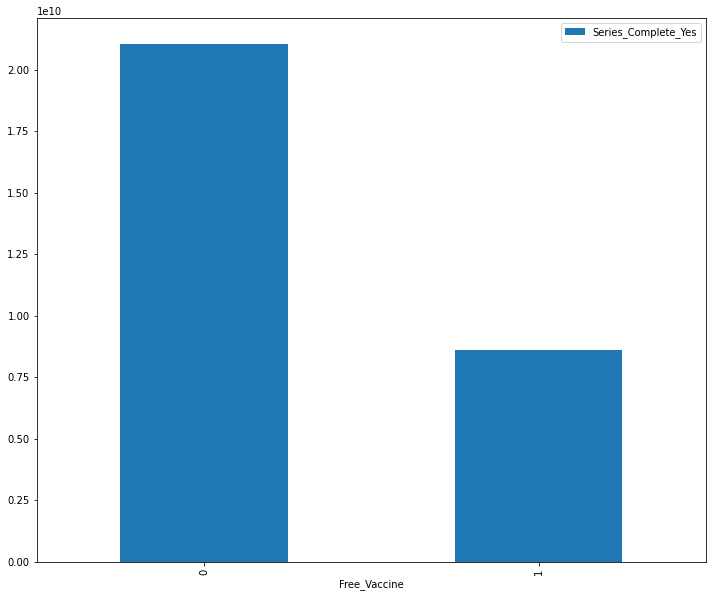

In [ ]:
jaffa.plot(kind='bar')

In [ ]:
daffa=dataframe.groupby(['Recip_County','Free_Vaccine']).agg({'Series_Complete_Yes':'sum'})

In [ ]:
daffa.reset_index(level=0, inplace=True)

In [ ]:
daffa.reset_index(level=0, inplace=True)

In [ ]:
daffa

,Free_Vaccine,Recip_County,Series_Complete_Yes
0,0,Abbeville County,1775221
1,1,Acadia Parish,4911790
2,0,Accomack County,3672496
3,0,Ada County,50026993
4,0,Adair County,3907680
...,...,...,...
2056,0,Yukon-Koyukuk Census Area,726809
2057,1,Yuma County,22793285
2058,0,Zapata County,150280
2059,0,Zavala County,104883


In [ ]:
dataframe[['Recip_County','Free_Vaccine','Series_Complete_Yes']].groupby('Recip_County').mean()

,Free_Vaccine,Series_Complete_Yes
Recip_County,,
Abbeville County,0,1775221
Acadia Parish,333,4911790
Accomack County,0,3672496
Ada County,0,50026993
Adair County,332,5148732
...,...,...
Yukon-Koyukuk Census Area,0,726809
Yuma County,664,22793285
Zapata County,0,150280


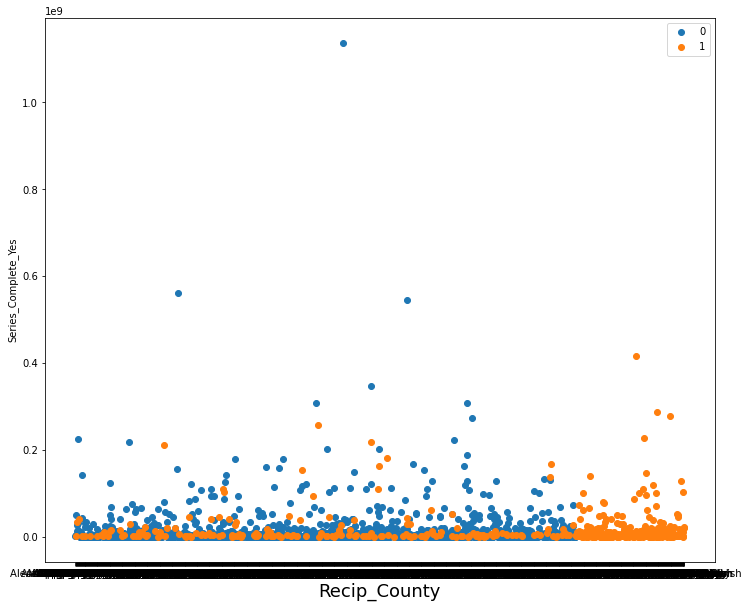

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
for i in [0, 1]:
    data = daffa[daffa['Free_Vaccine'] == i]
    plt.scatter(data['Recip_County'], data['Series_Complete_Yes'], label=i)
plt.legend()
plt.xlabel('Recip_County')
plt.ylabel('Series_Complete_Yes')
plt.show()

**deep analysis**

In [ ]:
df=dataframe

In [ ]:
df.sort_values(by='Date',ascending=False,inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df["Total_vaccinations"]= df.groupby("Recip_County").Series_Complete_Yes.head(1)

In [ ]:
dfc=df_cc2

In [ ]:
dfc.sort_values(by='date',ascending=False,inplace=True)
dfc.reset_index(drop=True, inplace=True)

In [ ]:
dfc["Total_Cases"]=dfc.groupby("fips").cases.head(1)

In [ ]:
dfc.dropna(inplace=True)

**Top 20 Counties with Heighest Vaccinationation**

In [ ]:
x=df.groupby("Recip_County")["Total_vaccinations"].mean().sort_values(ascending= False).head(20)

In [ ]:
x.index

Index(['Los Angeles County', 'Maricopa County', 'Miami-Dade County',
       'San Diego County', 'Queens County', 'Kings County',
       'Santa Clara County', 'Riverside County', 'Broward County',
       'Bexar County', 'New York County', 'Alameda County',
       'San Bernardino County', 'Tarrant County', 'Suffolk County',
       'Nassau County', 'Philadelphia County', 'Sacramento County',
       'Palm Beach County', 'Bronx County'],
      dtype='object', name='Recip_County')

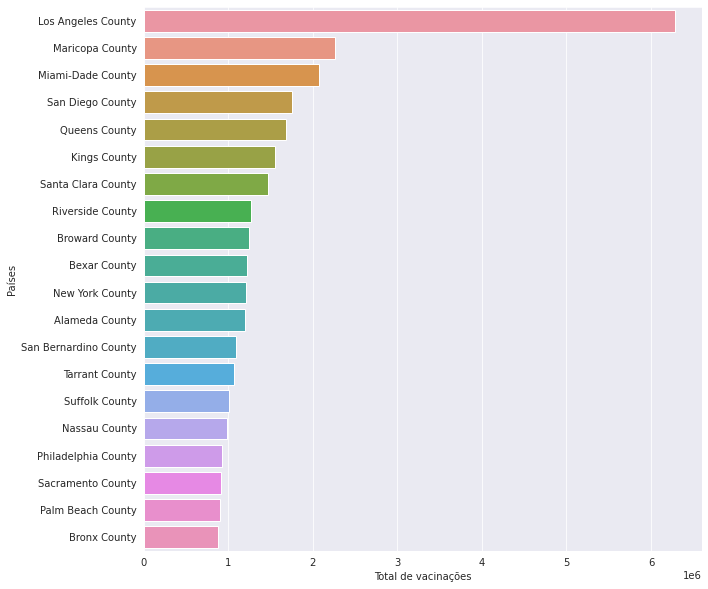

In [ ]:

sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total de vacinações")
ax.set_ylabel("Países")
plt.show()

**Least 20 Counties with Low Vaccinationation**

In [ ]:
l=df.groupby("Recip_County")["Total_vaccinations"].mean().sort_values(ascending= False).tail(20)

In [ ]:
l.index

Index(['Kenedy County', 'Hayes County', 'Banner County', 'Billings County',
       'Loup County', 'Nantucket County', 'Petroleum County', 'Arthur County',
       'Maui County', 'Slope County', 'Hawaii County', 'King County',
       'Kauai County', 'Inyo County', 'Modoc County', 'Loving County',
       'Mariposa County', 'Mono County', 'Alpine County', 'Plumas County'],
      dtype='object', name='Recip_County')

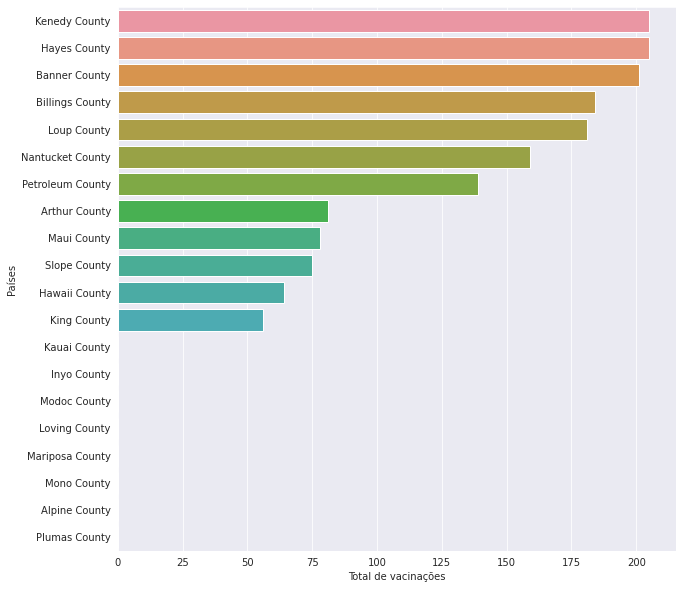

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(l.values,l.index)
ax.set_xlabel("Total de vacinações")
ax.set_ylabel("Países")
plt.show()

**Top Counties vaccination Trend over the period**

In [ ]:
y= df.loc[(df.Recip_County== "Los Angeles County") | (df.Recip_County== "San Diego County")| (df.Recip_County== "Maricopa County")| (df.Recip_County== "Miami-Dade County")|(df.Recip_County== "Queens County")]

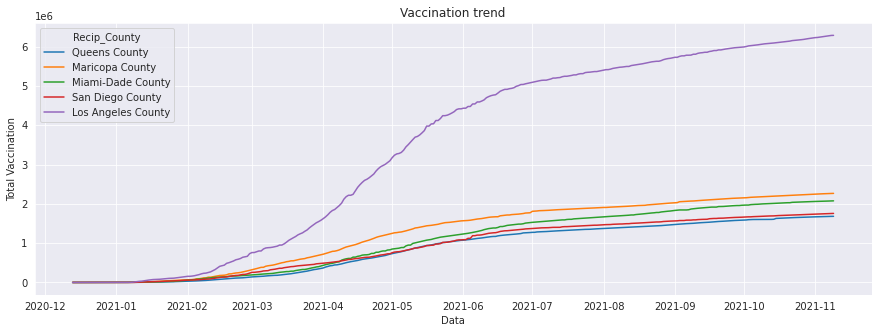

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "Date",y= "Series_Complete_Yes" ,data= y,hue= "Recip_County")
plt.xlabel("Data")
plt.ylabel("Total Vaccination")
plt.title("Vaccination trend")
plt.show()

**Lowest trend**

In [ ]:
z= df.loc[(df.Recip_County== "Hawaii County")| (df.Recip_County== "Slope County")| (df.Recip_County== "Maui County")|(df.Recip_County== "Arthur County")]

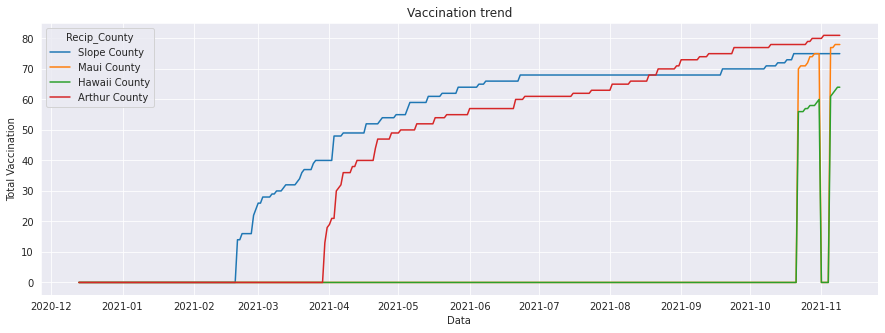

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "Date",y= "Series_Complete_Yes" ,data= z,hue= "Recip_County")
plt.xlabel("Data")
plt.ylabel("Total Vaccination")
plt.title("Vaccination trend")
plt.show()

**covid cases analysis**

In [ ]:
covid_coun= [ 6037, 6073, 36081	, 4013, 12086]

In [ ]:
tmp_cc=dfc[dfc['fips'].isin(covid_coun)]

In [ ]:
tmp_cc

,date,county,state,fips,cases,deaths,YearMonth,Total_Cases
2782,2021-12-01,Miami-Dade,Florida,12086.0,679200,9121.0,2021-12,679200
2911,2021-12-01,San Diego,California,6073.0,407542,4340.0,2021-12,407542
2939,2021-12-01,Los Angeles,California,6037.0,1529290,27184.0,2021-12,1529290
3040,2021-12-01,Maricopa,Arizona,4013.0,802164,12801.0,2021-12,802164


In [ ]:
pie_rep=tmp_cc[['county','cases']].set_index('county')

In [ ]:
pie_rep

,cases
county,
Los Angeles,1529290
Miami-Dade,679200
Maricopa,802164
Cook,678881
Harris,586858


In [ ]:
zc= dfc.loc[(df_cc2.county== "Los Angeles")| (df_cc2.county== "Miami-Dade")| (df_cc2.county== "Maricopa")|(dfc.fips== 6073.0)]

In [ ]:
zc.set_index('county')

,date,state,fips,cases,deaths,YearMonth,Total_Cases
county,,,,,,,
Webster,2021-12-01,West Virginia,54101.0,1400,26.0,2021-12,1400
Suffolk city,2021-12-01,Virginia,51800.0,11257,249.0,2021-12,11257
Davis,2021-12-01,Utah,49011.0,60955,290.0,2021-12,60955
San Diego,2021-12-01,California,6073.0,407542,4340.0,2021-12,407542


In [ ]:
zzc=zc[['county','cases','deaths']]

In [ ]:
zzc.set_index('county',inplace=True)

In [ ]:
zzc['cases']=np.log2(zzc['cases'])

In [ ]:
zzc['deaths']=np.log2(zzc['deaths'])

In [ ]:
zzc

,cases,deaths
county,,
Webster,10.451211,4.700440
Suffolk city,13.458535,7.960002
Davis,15.895457,8.179909
San Diego,18.636589,12.083479


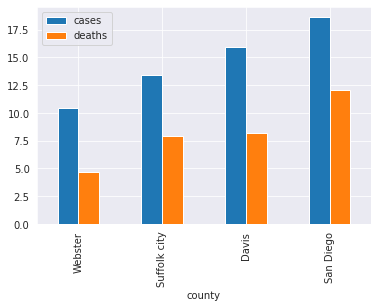

In [ ]:
zzc.plot.bar()

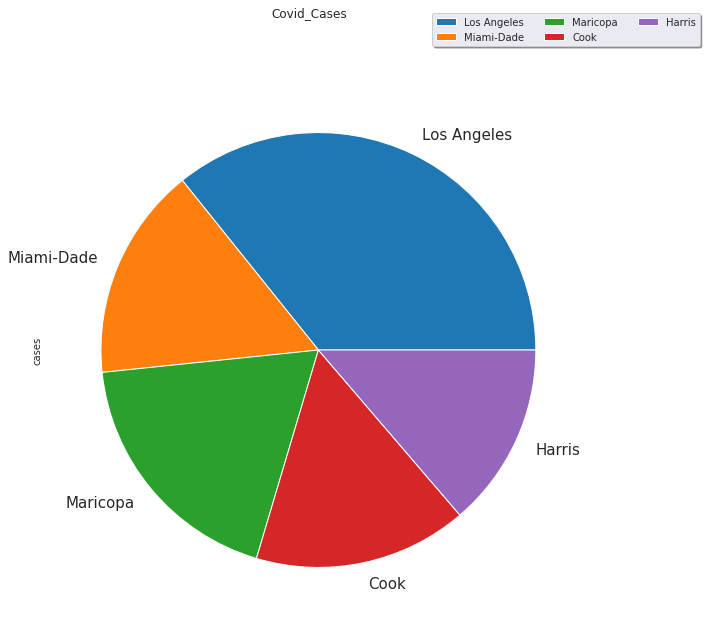

In [ ]:
pie_rep.plot.pie(subplots=True,figsize=[10,10],autopct='%.2f',title='Covid_Cases', fontsize=15)
plt.legend(loc='lower left', bbox_to_anchor=(0.7, 1.05),
          ncol=3, fancybox=True, shadow=True);

In [ ]:
covid_coun1=[48269,15001,38087,15009,31005]

In [ ]:
tmp_cc1=dfc[dfc['fips'].isin(covid_coun1)]

In [ ]:
tmp_cc1

,date,county,state,fips,cases,deaths,Total_Cases,YearMonth
1487,2021-12-01,Maui,Hawaii,15009.0,10396,102.0,10396.0,2021-12
1491,2021-12-01,Hawaii,Hawaii,15001.0,11708,139.0,11708.0,2021-12
1741,2021-12-01,King,Texas,48269.0,22,0.0,22.0,2021-12
2593,2021-12-01,Arthur,Nebraska,31005.0,25,1.0,25.0,2021-12
2958,2021-12-01,Slope,North Dakota,38087.0,55,0.0,55.0,2021-12


In [ ]:
zzc1=tmp_cc1[['county','cases','deaths']]

In [ ]:
zzc1.set_index('county',inplace=True)

In [ ]:
zzc1['cases']=np.log2(zzc1['cases'])
zzc1['deaths']=np.log2(zzc1['deaths'])

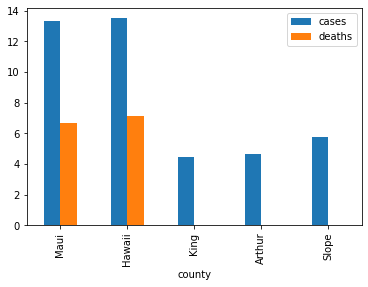

In [ ]:
zzc1.plot.bar()

In [ ]:
pie_rep1=tmp_cc1[['county','cases']].set_index('county')

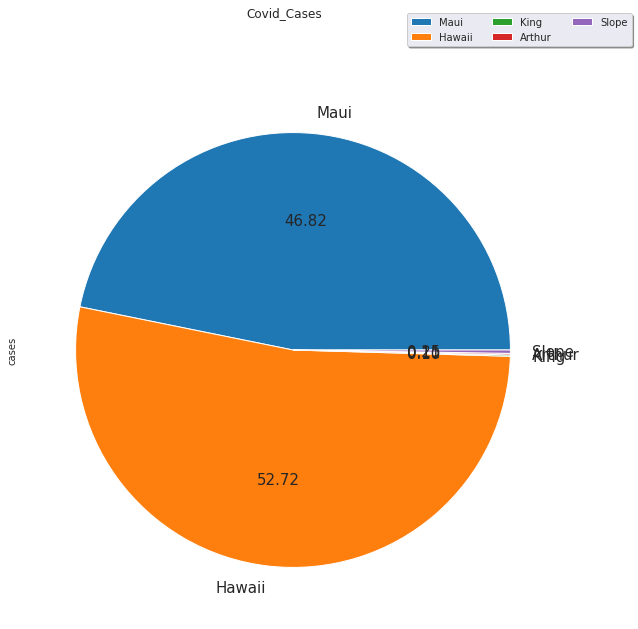

In [ ]:
pie_rep1.plot.pie(subplots=True,figsize=[10,10],autopct='%.2f',title='Covid_Cases', fontsize=15)
plt.legend(loc='lower left', bbox_to_anchor=(0.7, 1.05),
          ncol=3, fancybox=True, shadow=True);

In [ ]:
#covid_coun= [ 6037, 17031, 48201,  4013, 12086,  6059,  6073, 36081, 53033, 36047,
        6085, 48113,  6065, 12011, 48029, 36061,  6001, 25017, 32003,  6071]

In [ ]:
#covid_trend = df_covid_cases.loc[df_covid_cases['fips_code'].isin(covid_coun)]

In [ ]:
#c= covid_trend.loc[(covid_trend.fips_code== 6037) | (covid_trend.fips_code== 17031)|(covid_trend.fips_code== 4013) |(covid_trend.fips_code== 12086)]

In [ ]:
#c['report_date']=pd.to_datetime(c['report_date'],format='%Y/%M/%d')
#c['YearMonth'] = c['report_date'].dt.strftime('%Y-%m')

In [ ]:
#c['Date']=pd.to_datetime(c['report_date'],format='%Y/%M')
#c['Date'] = c['report_date'].dt.strftime('%Y-%m')

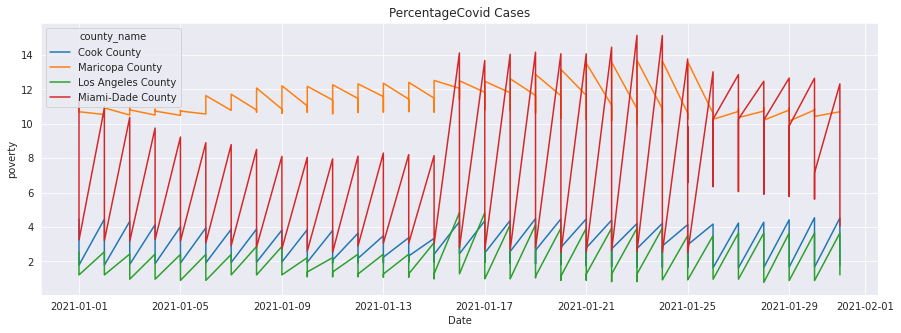

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "Date",y= "" ,data= c,hue= "county_name")
plt.xlabel("Date")
plt.ylabel("poverty")
plt.title("PercentageCovid Cases")
plt.show()

**Top Counties Data Collection**

In [ ]:
county=['Los Angeles County', 'Maricopa County', 'Miami-Dade County',
       'San Diego County', 'Queens County', 'Kings County',
       'Santa Clara County', 'Riverside County', 'Broward County',
       'Bexar County', 'New York County', 'Alameda County',
       'San Bernardino County', 'Tarrant County', 'Suffolk County',
       'Nassau County', 'Philadelphia County', 'Sacramento County',
       'Palm Beach County', 'Bronx County']

In [ ]:
llp=df.loc[df['Recip_County'].isin(county)]

In [ ]:
llp['FIPS'].unique()

<IntegerArray>
[36081, 36005, 36059, 36047, 36103, 48029, 36061, 42101,  4013, 25025, 12011,
 12086, 48439,  6071,  6073, 12099, 12089,  6085,  6031,  6001,  6065,  6067,
  6037]
Length: 23, dtype: Int64

In [ ]:
v_fips= [36081, 36005, 36059, 36047, 36103, 48029, 36061, 42101,  4013, 25025, 12011,
 12086, 48439,  6071,  6073, 12099, 12089,  6085,  6031,  6001,  6065,  6067,
  6037]

In [ ]:
t_values=[6285278., 2265664., 2075462., 1755886., 1681946., 1550370.,
       1467364., 1271829., 1250590., 1226117., 1213258., 1197748.,
       1088050., 1068012., 1004932.,  980574.,  921631.,  913722.,
        906168.,  878777.]

In [ ]:
top_df=df.loc[df['FIPS'].isin(v_fips)]

In [ ]:
top_df=df.loc[df['Total_vaccinations'].isin(t_values)]

In [ ]:
top_df.reset_index(drop=True,inplace=True)

In [ ]:
imp_features=['FIPS','MMWR_week','Recip_County','SVI_CTGY','Series_Complete_12Plus','Recip_State','Metro_status', 'below_high_school','High_school_diploma',
              'Some_college_degree','Population','Higher_Bachelors_degree',	'Poverty_ALL',	'Median_Household_Income','Series_Complete_65Plus',
'Civilian_labor_force_2020',	'Employed_2020',	'Unemployed_2020',	'Free_Vaccine',	'Mandate_place',	'YearMonth','Total_vaccinations']

In [ ]:
top_counties=top_df[imp_features]

In [ ]:
top_counties.sort_values(by='Total_vaccinations',ascending=False,inplace=True)

In [ ]:
top_counties.reset_index(drop=True,inplace=True)

**Top 5 Data Set**

In [ ]:
repr=top_counties.head(5).reset_index(drop=True)

In [ ]:
repr=repr.set_index('Recip_County')

In [ ]:
sel=['Population','Employed_2020']
rep=repr[sel]

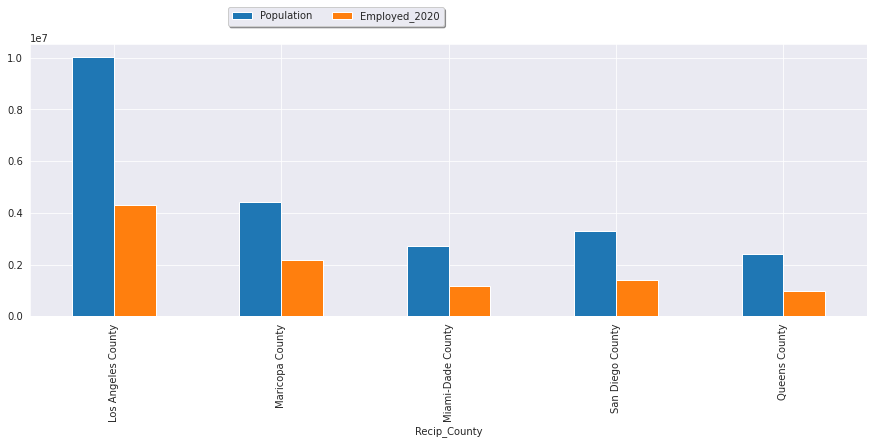

In [ ]:
rep.plot.bar(figsize=[15,5])
plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True);

**Lowest Counties Data Collection**

In [ ]:
counties=['Banner County', 'Billings County', 'Loup County', 'Nantucket County',
       'Petroleum County', 'Arthur County', 'Maui County', 'Slope County',
       'Hawaii County', 'King County', 'Trinity County', 'Modoc County',
       'Mono County', 'Mariposa County', 'Loving County', 'Alpine County',
       'Kauai County', 'Plumas County', 'Inyo County', 'Sierra County']

In [ ]:
low_df=df.loc[df['Recip_County'].isin(counties)]

In [ ]:
low_df['FIPS'].unique()

<IntegerArray>
[30069, 38087, 25019, 38007, 48269, 48455, 31005, 15007, 31007, 15009, 15001,
 31115, 35051, 48301,  6063,  6027,  6049,  6003,  6051,  6043]
Length: 20, dtype: Int64

In [ ]:
l_fips=[ 6063,  6091, 48301, 35051,  6043,  6003,  6051,  6049,  6105,  6027, 48455,
 48269, 38007, 25019, 38087, 30069, 31007, 15007, 15009, 53033, 31115, 15001,
 31005]

l_values=[201., 184., 181., 159., 139.,  81.,  78.,  75.,  64.,  56.]

In [ ]:
low_df=df.loc[df['FIPS'].isin(l_fips)]

In [ ]:
low_df=df.loc[df['Total_vaccinations'].isin(l_values)]

In [ ]:
low_counties=low_df[imp_features]

In [ ]:
low_counties.sort_values(by='Total_vaccinations',ascending=False,inplace=True)

In [ ]:
low_counties.reset_index(drop=True,inplace=True)

**Least 5 Counties**

In [ ]:
low_counties

,FIPS,MMWR_week,Recip_County,SVI_CTGY,Series_Complete_12Plus,Recip_State,Metro_status,below_high_school,High_school_diploma,Some_college_degree,Population,Higher_Bachelors_degree,Poverty_ALL,Median_Household_Income,Series_Complete_65Plus,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Free_Vaccine,Mandate_place,YearMonth,Total_vaccinations
0,31007,45,Banner County,1,201.0,NE,0,16,135,254,674,123,84,54706,67,380,370,10,0,3,2021-11-09,201.0
1,38007,45,Billings County,1,184.0,ND,0,74,233,213,945,186,90,69528,51,438,422,16,0,2,2021-11-09,184.0
2,31115,45,Loup County,1,181.0,NE,0,9,136,200,607,117,100,51559,70,409,397,12,0,3,2021-11-09,181.0
3,25019,45,Nantucket County,1,159.0,MA,0,358,1625,1881,14255,4328,620,96030,50,7664,6873,791,1,2,2021-11-09,159.0
4,30069,45,Petroleum County,1,139.0,MT,0,4,138,94,496,114,72,42081,77,264,255,9,0,3,2021-11-09,139.0
5,31005,45,Arthur County,1,81.0,NE,0,18,74,119,434,75,63,46417,40,231,219,12,0,3,2021-11-09,81.0
6,15009,45,Maui County,2,78.0,HI,1,9473,36912,39613,164754,32119,17638,77375,16,82820,68056,14764,0,2,2021-11-09,78.0
7,38087,45,Slope County,1,75.0,ND,0,54,155,194,706,141,101,52695,41,391,379,12,0,2,2021-11-09,75.0
8,15001,45,Hawaii County,3,64.0,HI,0,10886,42737,46398,200629,41656,26071,64929,16,89119,78986,10133,0,2,2021-11-09,64.0
9,48269,45,King County,1,56.0,TX,0,32,55,38,265,33,30,71256,12,236,232,4,0,3,2021-11-09,56.0


In [ ]:
rep2=low_counties.tail(5).set_index('Recip_County')

In [ ]:
sel=['Population','Employed_2020']


In [ ]:
#df_min_max_scaled = rep2[sel].copy()
   
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  

In [ ]:
df_min_max_scaled=rep2[sel]

In [ ]:
df_min_max_scaled['Population']=np.log2(df_min_max_scaled['Population'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_min_max_scaled['Employed_2020']=np.log2(df_min_max_scaled['Employed_2020'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_min_max_scaled

,Population,Employed_2020
Recip_County,,
Arthur County,8.761551,7.774787
Maui County,17.329954,16.054435
Slope County,9.463524,8.566054
Hawaii County,17.614171,16.269309
King County,8.049849,7.857981


In [ ]:
#df_max_scaled = rep2[sel].copy()
  
# apply normalization techniques
#for column in df_max_scaled.columns:
    #df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

In [ ]:
#df_max_scaled['Population']=200*df_max_scaled['Population']

In [ ]:
#df_max_scaled['Employed_2020']=200*df_max_scaled['Employed_2020']

In [ ]:
#df_max_scaled

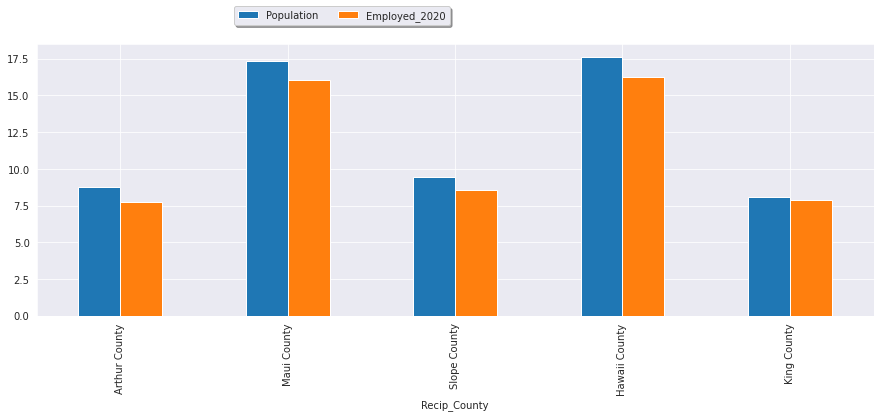

In [ ]:
df_min_max_scaled.plot.bar(figsize=[15,5])
plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True);

New Rule

In [ ]:
repr.reset_index(level=0, inplace=True)

In [ ]:
sc_rep=repr[['Recip_County','SVI_CTGY','Total_vaccinations']]

In [ ]:
a=[3,4]

In [ ]:
import matplotlib.pyplot as px
px.scatter(sc_rep,x='SVI_CTGY',y='Total_vaccinations', color='Recip_County',
           title='SVI_vs_Vaccination',range_y=[0,1500])

**K Means**

In [ ]:
top_counties

In [ ]:
low_counties

In [ ]:
clu=top_counties[['SVI_CTGY','Total_vaccinations']].head(10)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(2).fit(clu)

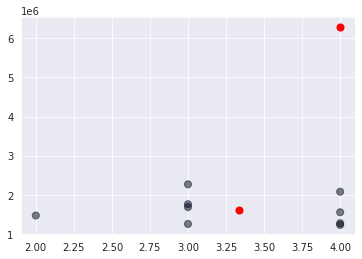

In [ ]:
centroids = kmeans.cluster_centers_

plt.scatter(clu['SVI_CTGY'], clu['Total_vaccinations'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
clu_l=low_counties[['SVI_CTGY','Total_vaccinations']].head(10)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3).fit(clu_l)

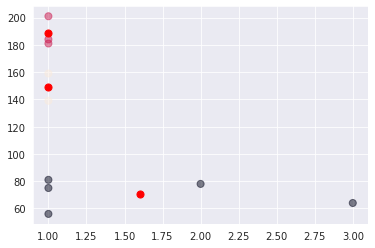

In [ ]:
centroids = kmeans.cluster_centers_

plt.scatter(clu_l['SVI_CTGY'], clu_l['Total_vaccinations'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
mains=df[['SVI_CTGY','Series_Complete_Yes']]

In [ ]:
mains['SVI_CTGY'].unique()

array([3, 4, 1, 2, 0])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(5).fit(mains)

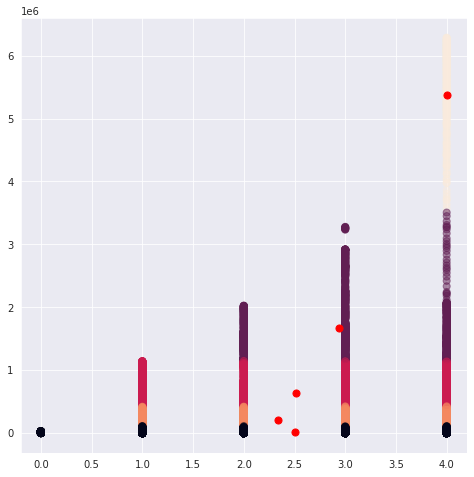

In [ ]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 8))
plt.scatter(mains['SVI_CTGY'], mains['Series_Complete_Yes'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
low_counties

,FIPS,MMWR_week,Recip_County,SVI_CTGY,Series_Complete_12Plus,Recip_State,Metro_status,below_high_school,High_school_diploma,Some_college_degree,Population,Higher_Bachelors_degree,Poverty_ALL,Median_Household_Income,Series_Complete_65Plus,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Free_Vaccine,Mandate_place,YearMonth,Total_vaccinations
0,31007,45,Banner County,1,201.0,NE,0,16,135,254,674,123,84,54706,67,380,370,10,0,3,2021-11-01,201.0
1,38007,45,Billings County,1,184.0,ND,0,74,233,213,945,186,90,69528,51,438,422,16,0,2,2021-11-01,184.0
2,31115,45,Loup County,1,181.0,NE,0,9,136,200,607,117,100,51559,70,409,397,12,0,3,2021-11-01,181.0
3,25019,45,Nantucket County,1,159.0,MA,0,358,1625,1881,14255,4328,620,96030,50,7664,6873,791,1,2,2021-11-01,159.0
4,30069,45,Petroleum County,1,139.0,MT,0,4,138,94,496,114,72,42081,77,264,255,9,0,3,2021-11-01,139.0
5,31005,45,Arthur County,1,81.0,NE,0,18,74,119,434,75,63,46417,40,231,219,12,0,3,2021-11-01,81.0
6,15009,45,Maui County,2,78.0,HI,1,9473,36912,39613,164754,32119,17638,77375,16,82820,68056,14764,0,2,2021-11-01,78.0
7,38087,45,Slope County,1,75.0,ND,0,54,155,194,706,141,101,52695,41,391,379,12,0,2,2021-11-01,75.0
8,15001,45,Hawaii County,3,64.0,HI,0,10886,42737,46398,200629,41656,26071,64929,16,89119,78986,10133,0,2,2021-11-01,64.0
9,48269,45,King County,1,56.0,TX,0,32,55,38,265,33,30,71256,12,236,232,4,0,3,2021-11-01,56.0


In [ ]:
df_cc2

,date,county,state,fips,cases,deaths,Total_Cases,YearMonth
0,2021-12-01,Weston,Wyoming,56045.0,1193,14.0,1193.0,2021-12
1,2021-12-01,Laurel,Kentucky,21125.0,13269,156.0,13269.0,2021-12
2,2021-12-01,Knox,Kentucky,21121.0,7438,77.0,7438.0,2021-12
3,2021-12-01,Knott,Kentucky,21119.0,2528,43.0,2528.0,2021-12
4,2021-12-01,Kenton,Kentucky,21117.0,26859,288.0,26859.0,2021-12
...,...,...,...,...,...,...,...,...
3135,2021-12-01,Mercer,Ohio,39107.0,6866,98.0,6866.0,2021-12
3136,2021-12-01,Marion,Ohio,39101.0,13186,194.0,13186.0,2021-12
3137,2021-12-01,Monroe,Ohio,39111.0,2345,61.0,2345.0,2021-12
3138,2021-12-01,Montgomery,Ohio,39113.0,79920,1395.0,79920.0,2021-12


In [ ]:
top_counties

,FIPS,MMWR_week,Recip_County,SVI_CTGY,Series_Complete_12Plus,Recip_State,Metro_status,below_high_school,High_school_diploma,Some_college_degree,Population,Higher_Bachelors_degree,Poverty_ALL,Median_Household_Income,Series_Complete_65Plus,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Free_Vaccine,Mandate_place,YearMonth,Total_vaccinations
0,6037,45,Los Angeles County,4,6273623.0,CA,1,1437059,1419449,1789308,10014009,2241079,1319242,72721,1129912,4921499,4291688,629811,0,2,2021-11-01,6285278.0
1,4013,45,Maricopa County,3,2265596.0,AZ,1,353350,644671,939477,4420568,941317,539670,68634,555784,2331628,2159267,172361,1,3,2021-11-01,2265664.0
2,12086,45,Miami-Dade County,4,2074848.0,FL,1,355100,522159,466710,2701767,570125,419056,54991,419648,1291854,1188173,103681,0,3,2021-11-01,2075462.0
3,6073,45,San Diego County,3,1752252.0,CA,1,282031,409613,683145,3298634,871782,335034,83576,318995,1538361,1396547,141814,0,2,2021-11-01,1755886.0
4,36081,45,Queens County,3,1681862.0,NY,1,295810,453171,367155,2405464,529260,245941,72975,299102,1098937,961214,137723,1,1,2021-11-01,1681946.0
5,36047,45,Kings County,4,1550226.0,NY,1,313615,458191,340996,2736074,667445,446923,66501,262549,1151130,1006852,144278,1,1,2021-11-01,1550370.0
6,6085,45,Santa Clara County,2,1462632.0,CA,1,155203,188180,292055,1936259,699520,116401,132444,246269,1020693,949353,71340,0,2,2021-11-01,1467364.0
7,6065,45,Riverside County,4,1270074.0,CA,1,280136,418902,512894,2418185,347937,274953,72905,289125,1107723,997725,109998,0,2,2021-11-01,1271829.0
8,12011,45,Broward County,3,1250508.0,FL,1,150481,372500,397726,1944375,441489,237486,61429,293199,1020586,930297,90289,0,3,2021-11-01,1250590.0
9,48029,45,Bexar County,4,1226004.0,TX,1,197394,316364,384219,2009324,349451,298018,58956,220068,942127,871017,71110,0,3,2021-11-01,1226117.0


In [ ]:
allvac=df

In [ ]:
allvac.dropna(inplace=True)

In [ ]:
def plot_custom_scatter(df, x, y, size, color):
    fig = px.scatter(df, x=x, y=y, size=size, color=color)
    fig.update_layout({'legend_orientation':'h'})
    fig.update_layout(legend=dict(yanchor="top", y=-0.2))
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
    fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.show() 

In [ ]:
plot_custom_scatter(allvac, x="Series_Complete_Yes", y="Population", size="Series_Complete_Yes", color="Recip_County")

**Covid Cases And deaths**

In [ ]:
rep2.reset_index(level=0, inplace=True)

In [ ]:
tmp_cc1['fips']=tmp_cc1['fips'].astype(int)

In [ ]:
tmp_cc1.rename(columns={"fips": "FIPS"},inplace=True)

In [ ]:
rep2=rep2.merge(tmp_cc1,on=['FIPS'])

In [ ]:
rep2['cases']=np.log2(rep2['cases'])
rep2['deaths']=np.log2(rep2['deaths'])

,FIPS,MMWR_week,SVI_CTGY,Series_Complete_12Plus,Recip_State,Metro_status,below_high_school,High_school_diploma,Some_college_degree,Population,Higher_Bachelors_degree,Poverty_ALL,Median_Household_Income,Series_Complete_65Plus,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Free_Vaccine,Mandate_place,YearMonth_x,Total_vaccinations,date,county,state,cases,deaths,Total_Cases,YearMonth_y
Recip_County,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arthur County,31005,45,1,81.0,NE,0,18,74,119,434,75,63,46417,40,231,219,12,0,3,2021-11-09,81.0,2021-12-01,Arthur,Nebraska,4.643856,0.000000,25.0,2021-12
Maui County,15009,45,2,78.0,HI,1,9473,36912,39613,164754,32119,17638,77375,16,82820,68056,14764,0,2,2021-11-09,78.0,2021-12-01,Maui,Hawaii,13.343741,6.672425,10396.0,2021-12
Slope County,38087,45,1,75.0,ND,0,54,155,194,706,141,101,52695,41,391,379,12,0,2,2021-11-09,75.0,2021-12-01,Slope,North Dakota,5.781360,-inf,55.0,2021-12
Hawaii County,15001,45,3,64.0,HI,0,10886,42737,46398,200629,41656,26071,64929,16,89119,78986,10133,0,2,2021-11-09,64.0,2021-12-01,Hawaii,Hawaii,13.515207,7.118941,11708.0,2021-12
King County,48269,45,1,56.0,TX,0,32,55,38,265,33,30,71256,12,236,232,4,0,3,2021-11-09,56.0,2021-12-01,King,Texas,4.459432,-inf,22.0,2021-12


In [ ]:
sho=rep2[['Recip_County','Total_vaccinations','cases','deaths']]

In [ ]:
sho.set_index('Recip_County',inplace=True)

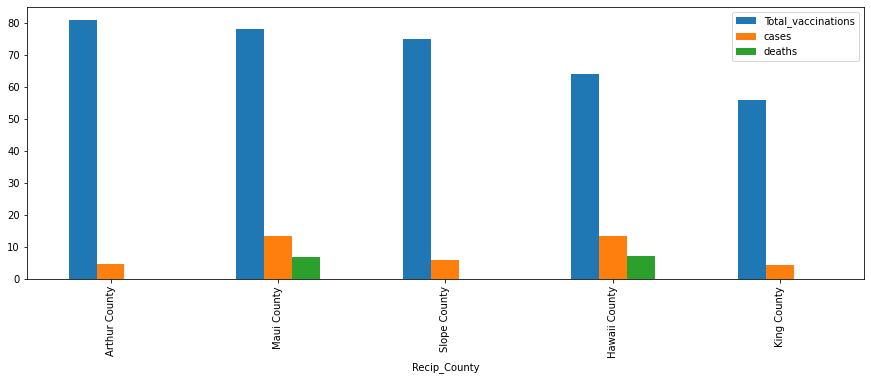

In [ ]:
sho.plot.bar(figsize=[15,5])

**high**

In [ ]:
repr.reset_index(level=0, inplace=True)

In [ ]:
tmp_cc['fips']=tmp_cc['fips'].astype(int)
tmp_cc.rename(columns={"fips": "FIPS"},inplace=True)

In [ ]:
repr=repr.merge(tmp_cc,on=['FIPS'])

In [ ]:
repr['cases']=np.log2(repr['cases'])
repr['deaths']=np.log2(repr['deaths'])

In [ ]:
repr['Total_vaccinations']=np.log2(repr['Total_vaccinations'])

In [ ]:
sho1=repr[['Recip_County','Total_vaccinations','cases','deaths']]

In [ ]:
sho1.set_index('Recip_County',inplace=True)

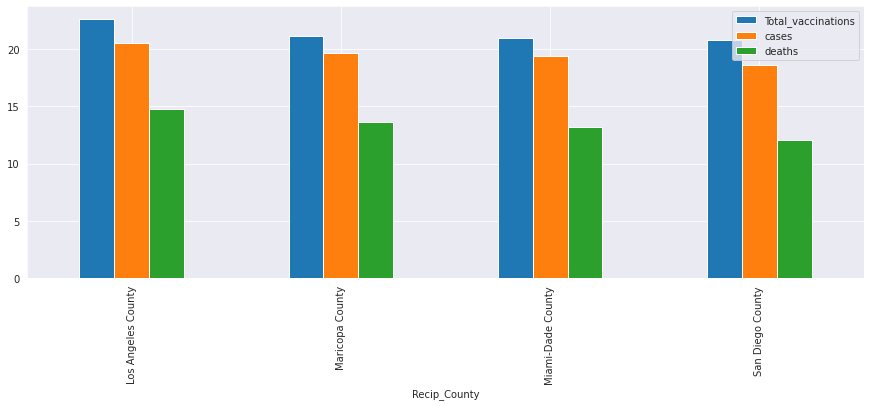

In [ ]:
sho1.plot.bar(figsize=[15,5])

# Model Linear Regression

In [ ]:
feature_cols=['FIPS','Series_Complete_12Plus','Administered_Dose1_Recip_12Plus','SVI_CTGY','Series_Complete_12PlusPop_Pct_SVI','Metro_status',
              'Series_Complete_12PlusPop_Pct_UR_Equity','Population','below_high_school','High_school_diploma','Some_college_degree','Higher_Bachelors_degree','Poverty_ALL',
              'Free_Vaccine','Mandate_place','Median_Household_Income']

In [ ]:
validation_set=dataframe[(dataframe['YearMonth'] > '2021-09')]
train=dataframe[(dataframe['YearMonth'] > '2020-09') & (dataframe['YearMonth'] < '2021-09')]

In [ ]:
x_train=train[feature_cols]
y_train=train.Series_Complete_Yes

In [ ]:
pd.to_datetime("12-11-2010 00:00", format="%d-%m-%Y %H:%M")

In [ ]:
from sklearn.linear_model import LinearRegression

#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred1=lr.predict(validation_set[feature_cols])

In [ ]:
import sklearn
import math

mse = sklearn.metrics.mean_squared_error(list(validation_set.Series_Complete_Yes), y_pred1)

rmse = math.sqrt(mse)

print(rmse)

5022.356395183156


# Model Random Regression

In [ ]:
features_clmns =['Date','FIPS','Series_Complete_12Plus','Administered_Dose1_Recip_12Plus','SVI_CTGY','Series_Complete_12PlusPop_Pct_SVI','Metro_status',
              'Series_Complete_12PlusPop_Pct_UR_Equity','Population','below_high_school','High_school_diploma','Some_college_degree','Higher_Bachelors_degree','Poverty_ALL',
              'Free_Vaccine','Mandate_place','Median_Household_Income']

In [ ]:
data_regre=dataframe

In [ ]:
data_regre['Date'] = data_regre['Date'].values.astype(float)

In [ ]:
validation_set=data_regre[(data_regre['YearMonth'] > '2021-09')]
train=data_regre[(data_regre['YearMonth'] > '2020-09') & (data_regre['YearMonth'] < '2021-09')]

In [ ]:
X_train=train[features_clmns]
X_test=train['Series_Complete_Yes']
y_train=train[features_clmns]
y_test=validation_set['Series_Complete_Yes']

In [ ]:
def rmpse(y_true, y_pred):
    ytr = []
    ypr = []
    cnt = 0
    for i, x in enumerate(y_true):
        if x==0:
            continue
        ytr.append(x)
        ypr.append(y_pred[i])
    rmpse = np.sqrt(np.mean(np.square(((np.array(ytr) - np.array(ypr)) / np.array(ytr))), axis=0))
    return rmpse

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=50, max_depth=30, random_state=0)
X = train[features_clmns]
Y = train['Series_Complete_Yes']
regr.fit(X, Y)
y_pred=regr.predict(validation_set[features_clmns])
rmpse(validation_set["Series_Complete_Yes"].values, y_pred)

0.012809248676215738

# Model ARIMA

In [ ]:
features_clmns =['Date','FIPS','Recip_County','Series_Complete_12Plus','Administered_Dose1_Recip_12Plus','SVI_CTGY','Series_Complete_12PlusPop_Pct_SVI','Metro_status',
              'Series_Complete_12PlusPop_Pct_UR_Equity','Population','below_high_school','High_school_diploma','Some_college_degree','Higher_Bachelors_degree','Poverty_ALL',
              'Free_Vaccine','Mandate_place','Median_Household_Income']

In [ ]:
dataframe = dataframe.sort_values('Recip_County')
dataframe['eid'] = (dataframe.groupby(['Recip_County']).cumcount()==0).astype(int)
dataframe['eid'] = dataframe['eid'].cumsum()

In [ ]:
dataframe[dataframe['FIPS']==36103]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Population,below_high_school,High_school_diploma,Some_college_degree,Higher_Bachelors_degree,Poverty_ALL,Median_Household_Income,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Free_Vaccine,Mandate_place,YearMonth,Year,Month,eid
670458,2021-10-20,36103,42,Suffolk County,NY,66.5,982319,982276.0,76.7,921949,79.0,230284,90.0,97.6,1073172.0,72.7,1073043.0,83.8,1005441.0,86.1,253030.0,98.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-10-01,2021,10,1618
670459,2021-10-19,36103,42,Suffolk County,NY,66.4,980942,980899.0,76.6,920672,78.9,230192,89.9,97.6,1072033.0,72.6,1071904.0,83.7,1004374.0,86.0,252751.0,98.8,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-10-01,2021,10,1618
670464,2021-10-14,36103,41,Suffolk County,NY,65.9,973382,973340.0,76.0,913932,78.3,229596,89.7,97.6,1065810.0,72.2,1065682.0,83.2,998717.0,85.5,251409.0,98.2,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-10-01,2021,10,1618
670461,2021-10-17,36103,42,Suffolk County,NY,66.3,978936,978893.0,76.4,918903,78.7,230071,89.9,97.6,1070406.0,72.5,1070277.0,83.6,1002930.0,85.9,252417.0,98.6,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-10-01,2021,10,1618
670462,2021-10-16,36103,41,Suffolk County,NY,66.2,977191,977148.0,76.3,917345,78.6,229965,89.9,97.6,1069078.0,72.4,1068949.0,83.5,1001732.0,85.8,252164.0,98.5,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-10-01,2021,10,1618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670538,2021-08-01,36103,31,Suffolk County,NY,57.8,852781,852752.0,66.6,814194,69.7,219506,85.8,97.5,928784.0,62.9,928684.0,72.5,881642.0,75.5,235156.0,91.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-08-01,2021,8,1618
670537,2021-08-02,36103,31,Suffolk County,NY,57.8,853838,853809.0,66.7,815066,69.8,219584,85.8,97.5,930492.0,63.0,930392.0,72.6,883038.0,75.6,235288.0,91.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-08-01,2021,8,1618
670536,2021-08-03,36103,31,Suffolk County,NY,57.9,854777,854748.0,66.7,815851,69.9,219709,85.8,97.5,932014.0,63.1,931913.0,72.8,884295.0,75.7,235440.0,92.0,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-08-01,2021,8,1618
670535,2021-08-04,36103,31,Suffolk County,NY,58.0,856085,856056.0,66.8,816939,70.0,219873,85.9,97.5,934362.0,63.3,934261.0,72.9,886198.0,75.9,235658.0,92.1,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-08-01,2021,8,1618


In [ ]:
ndf=dataframe.loc[dataframe['eid'] == 1618]
sndf = ndf.sort_values('Series_Complete_Yes')
sndf

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Population,below_high_school,High_school_diploma,Some_college_degree,Higher_Bachelors_degree,Poverty_ALL,Median_Household_Income,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Free_Vaccine,Mandate_place,YearMonth,Year,Month,eid
1038687,2020-12-27,25025,53,Suffolk County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,797936,75529,122379,100517,254858,126266,75843,446558,403388,43170,1,2,2020-12-01,2020,12,1618
1038691,2020-12-23,25025,52,Suffolk County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,797936,75529,122379,100517,254858,126266,75843,446558,403388,43170,1,2,2020-12-01,2020,12,1618
1038690,2020-12-24,25025,52,Suffolk County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,797936,75529,122379,100517,254858,126266,75843,446558,403388,43170,1,2,2020-12-01,2020,12,1618
1038689,2020-12-25,25025,52,Suffolk County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,797936,75529,122379,100517,254858,126266,75843,446558,403388,43170,1,2,2020-12-01,2020,12,1618
1038688,2020-12-26,25025,52,Suffolk County,MA,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,797936,75529,122379,100517,254858,126266,75843,446558,403388,43170,1,2,2020-12-01,2020,12,1618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670442,2021-11-05,36103,44,Suffolk County,NY,67.8,1000988,1000940.0,78.1,939047,80.4,232736,90.9,97.6,1094874.0,74.1,1094718.0,85.5,1025872.0,87.9,259901.0,99.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-11-01,2021,11,1618
670441,2021-11-06,36103,44,Suffolk County,NY,67.8,1001870,1001822.0,78.2,939858,80.5,232908,91.0,97.6,1096096.0,74.2,1095901.0,85.6,1026988.0,88.0,260319.0,99.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-11-01,2021,11,1618
670440,2021-11-07,36103,45,Suffolk County,NY,67.9,1002980,1002932.0,78.3,940864,80.6,233039,91.1,97.6,1097487.0,74.3,1097281.0,85.7,1028302.0,88.1,260758.0,99.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-11-01,2021,11,1618
670439,2021-11-08,36103,45,Suffolk County,NY,68.0,1004375,1004326.0,78.4,942090,80.7,233156,91.1,97.6,1099003.0,74.4,1098727.0,85.8,1029627.0,88.2,261198.0,99.9,1,4.0,4.0,4.0,4.0,1,4.0,4.0,4.0,4.0,1525920,97090,281922,277165,374665,97920,105241,764564,699613,64951,1,1,2021-11-01,2021,11,1618


In [ ]:
val=sndf['Series_Complete_Yes'].values

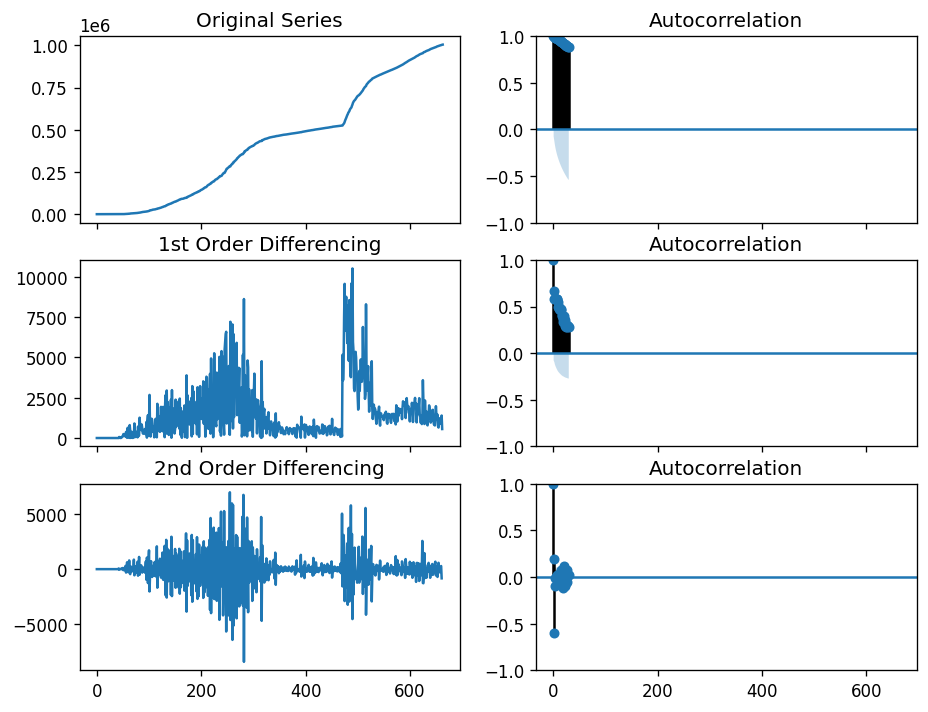

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [ ]:
pip install pmdarima

In [ ]:
pip install pyramid-arima

In [ ]:
pip install --upgrade Cython

In [ ]:
pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf',
max_p=3, max_q=3,
m=1,
d=None,
seasonal=False,
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=11213.308, Time=0.50 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11598.109, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11308.299, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=11224.980, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11596.112, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=11211.287, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=11265.666, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=11212.940, Time=0.32 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=11211.859, Time=0.46 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=11211.158, Time=0.23 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=11216.391, Time=0.41 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=11211.094, Time=0.45 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=11210.173, Time=0.22 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=11208.027, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0

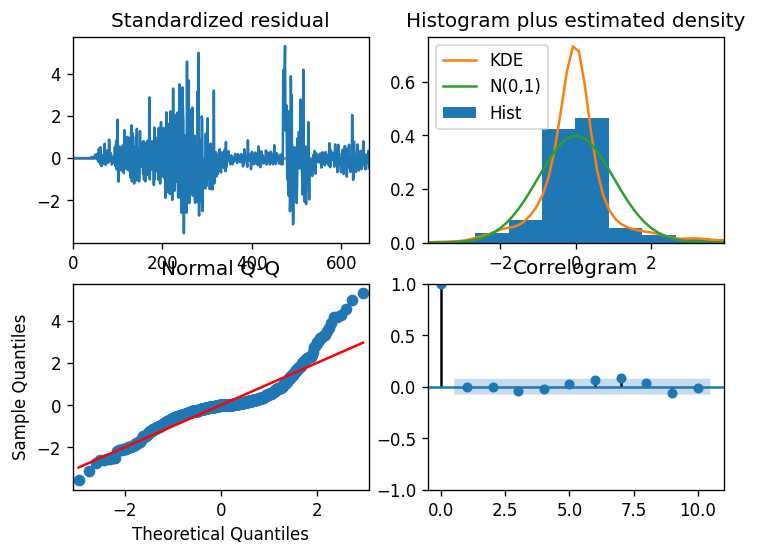

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

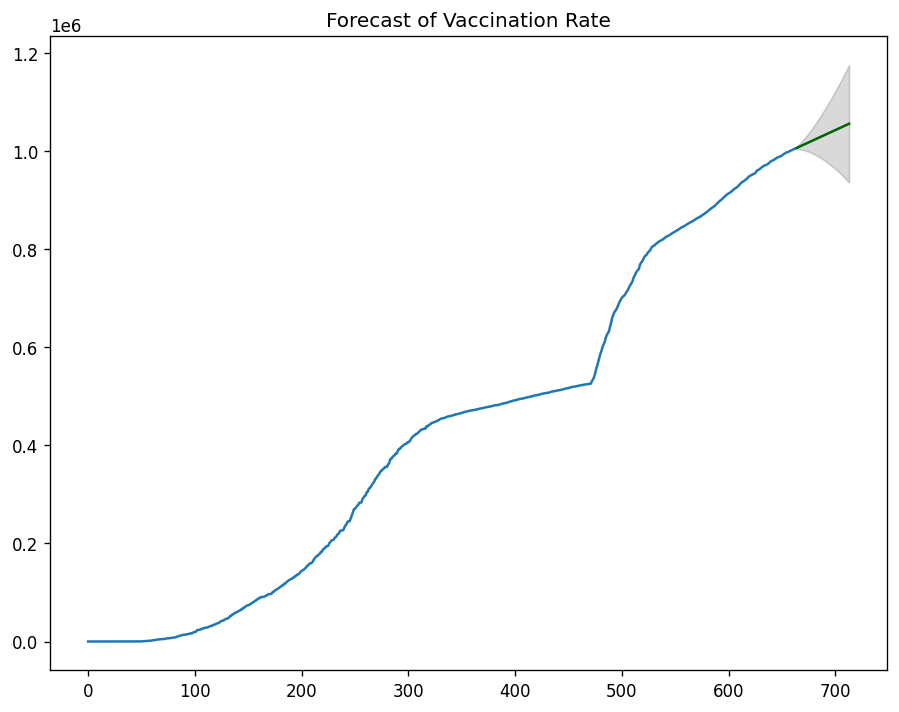

In [ ]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

# model LSTM

In [ ]:
data=dataframe.loc[dataframe['eid'] == 1618]

In [ ]:
data=data.filter(['Series_Complete_Yes'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

# Model PyCaret 

In [ ]:
pyf=dataframe.loc[dataframe['eid'] == 1618]

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043021 entries, 654165 to 492959
Data columns (total 48 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   Date                                     1043021 non-null  datetime64[ns]
 1   FIPS                                     1043021 non-null  Int64         
 2   MMWR_week                                1043021 non-null  int64         
 3   Recip_County                             1043021 non-null  object        
 4   Recip_State                              1043021 non-null  object        
 5   Series_Complete_Pop_Pct                  1043021 non-null  float64       
 6   Series_Complete_Yes                      1043021 non-null  int64         
 7   Series_Complete_12Plus                   1043021 non-null  float64       
 8   Series_Complete_12PlusPop_Pct            1043021 non-null  float64       
 9   Series_Co

In [ ]:
features_pyc =['Series_Complete_Yes','Series_Complete_12Plus','Completeness_pct',
              'Population','below_high_school','Unemployed_2020','Civilian_labor_force_2020','SVI_CTGY',
              'Free_Vaccine','Median_Household_Income','Year']

In [ ]:
data_pycaret=pyf

In [ ]:
data_pycaret['Date'] = data_pycaret['Date'].values.astype(float)

In [ ]:
test=data_pycaret[(data_pycaret['YearMonth'] > '2021-09')]
train=data_pycaret[(data_pycaret['YearMonth'] > '2020-09') & (data_pycaret['YearMonth'] < '2021-09')]

In [ ]:
train=train[features_pyc]
test=test[features_pyc]

In [ ]:
train.shape, test.shape

((524, 11), (80, 11))

In [ ]:
pip install pycaret Metro_status 'High_school_diploma', 'High_school_diploma','Poverty_ALL',

In [ ]:
from pycaret.regression import *

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 670601 to 1038481
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     524 non-null    float64       
 1   FIPS                                     524 non-null    Int64         
 2   MMWR_week                                524 non-null    int64         
 3   Recip_County                             524 non-null    object        
 4   Recip_State                              524 non-null    object        
 5   Series_Complete_Pop_Pct                  524 non-null    float64       
 6   Series_Complete_Yes                      524 non-null    int64         
 7   Series_Complete_12Plus                   524 non-null    float64       
 8   Series_Complete_12PlusPop_Pct            524 non-null    float64       
 9   Series_Complete_18Plus            

In [ ]:
s = setup(data = train, test_data = test, target = 'Series_Complete_Yes', fold_strategy = 'timeseries')

,Description,Value
0,session_id,8002
1,Target,Series_Complete_Yes
2,Original Data,"(524, 11)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(524, 4)"


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,136.4261,1.025008e+05,211.8339,1.0000,0.0005,0.0004,0.016
par,Passive Aggressive Regressor,138.1623,1.034666e+05,212.9290,1.0000,0.0005,0.0003,0.014
omp,Orthogonal Matching Pursuit,156.9712,9.204330e+04,205.9738,1.0000,0.0337,0.0004,0.011
en,Elastic Net,157.7142,9.221236e+04,206.3321,1.0000,0.0284,0.0004,0.013
lasso,Lasso Regression,157.9967,9.161947e+04,205.8499,1.0000,0.0312,0.0004,0.013
llar,Lasso Least Angle Regression,158.3477,9.353264e+04,211.1101,1.0000,0.4242,0.0062,0.011
ridge,Ridge Regression,164.4954,9.223227e+04,215.2503,1.0000,0.2385,0.0021,0.012
br,Bayesian Ridge,197.1855,1.287374e+05,266.6327,1.0000,0.3158,0.0110,0.012
lar,Least Angle Regression,198.5988,1.291643e+05,267.1616,1.0000,0.3207,0.0112,0.012
lr,Linear Regression,201.1478,1.340330e+05,271.0102,1.0000,0.3231,0.0119,0.013
